This code imports the long dataset from UCI Machine Learning Repository to tidy it.

URL Source: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption



In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

### Dataset Information

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).  
Notes:   
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.  
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.  

### Variable Information
1.date: Date in format dd/mm/yyyy  
2.time: time in format hh:mm:ss  
3.global_active_power: household global minute-averaged active power (in kilowatt)  
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)  
5.voltage: minute-averaged voltage (in volt)  
6.global_intensity: household global minute-averaged current intensity (in ampere)  
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).  
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.  
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.  


Source: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption


In [2]:
df_ori = pd.read_csv('data/household_power_consumption.txt', sep=';', header=0)

# convert variable names to lowercase
df_ori.rename(columns=lambda x: x.lower(), inplace=True)
df_ori.head()


C:\Users\augus\AppData\Local\Temp\ipykernel_19468\2838674969.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ori = pd.read_csv('data/household_power_consumption.txt', sep=';', header=0)


,date,time,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# Replicate the original dataframe
df = df_ori.copy()
df.head()


,date,time,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# Number of rows with NaN values for each specified column
na_rows_count = df[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3']].isna().any(axis=1).sum()

# Percentage of rows with NaN values
percentage_na_rows = (na_rows_count / len(df)) * 100

print("Number of rows with NaN values in the specified columns: {}".format(na_rows_count))
print("Percentage of rows with NaN values: {:.2f}%".format(percentage_na_rows))

Number of rows with NaN values in the specified columns: 25979
Percentage of rows with NaN values: 1.25%


In [5]:
# Since the number of empty rows is not significant, let's drop it:

print("Number of rows before dropping NaN values: {:,}".format(len(df)))
df_cleaned = df.dropna(subset=['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3'])

# Verify the result
print("Number of rows after dropping NaN values: {:,}".format(len(df_cleaned)))

print("Number of dropped rows: {:,}".format(len(df) - len(df_cleaned)))

Number of rows before dropping NaN values: 2,075,259
Number of rows after dropping NaN values: 2,049,280
Number of dropped rows: 25,979


In [6]:
 #This chunk will resample the dataset in daily and hourly formats

# Create a copy of the DataFrame
df_cleaned = df_cleaned.copy()

# create a new 'datetime' variable
df_cleaned['datetime'] = pd.to_datetime(df_cleaned['date'] + ' ' + df_cleaned['time'], dayfirst=True)

# Drop the unnecessary 'date' and 'time' columns
df_cleaned.drop(['date', 'time'], axis=1, inplace=True)

# Set the 'datetime' column as the index
df_cleaned.set_index('datetime', inplace=True)

# Ensure numeric columns are in the correct data type
numeric_columns = ['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3']
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')




In [7]:
# rename the variables 
# 
df_cleaned.columns = ['total_real_power', 'reactive_power', 'voltage', 'current_intensity', 'kitchen', 'laundry_room', 'temp_control']


# Since the variables 'kitchen', 'laundry_room', 'temp_control' are in watts-hour and we have the measure for each minute, we can convert it to kwatts

df_cleaned[['kitchen', 'laundry_room', 'temp_control']] = df_cleaned[['kitchen', 'laundry_room', 'temp_control']] * 60 / 1000




In [8]:
#
# Define aggregation functions for each column
agg_functions = {
    'total_real_power': 'sum',
    'reactive_power': 'sum',
    'voltage': 'mean',
    'current_intensity': 'sum',
    'kitchen': 'sum',
    'laundry_room': 'sum',
    'temp_control': 'sum'
}

# Resample the DataFrame by hour/day and aggregate using the defined functions
df_hourly = df_cleaned.resample('H').agg(agg_functions)
df_daily = df_cleaned.resample('D').agg(agg_functions)


# Reset the index
df_hourly.reset_index(inplace=True)
df_daily.reset_index(inplace=True)

# Set the 'datetime' column as the index
df_hourly.set_index('datetime', inplace=True)
df_daily.set_index('datetime', inplace=True)


In [9]:
# Fill some empty "voltage" values with 0

df_daily['voltage'][df_daily["voltage"].isna()] = 0


In [10]:
#Let's check if our dataset misses any day

# Get the min and max day from 'datetime' variable
min_date = df_daily.index.min()
max_date = df_daily.index.max()

# Generate a sequence of all dates between the minimum and maximum dates
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Compare
missing_dates = all_dates[~all_dates.isin(df_daily.index)]

# Print
print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [11]:
#Let's check if our dataset misses any hour

# Get the min and max date/time from 'datetime' variable 
min_date = df_hourly.index.min()
max_date = df_hourly.index.max()

# Generate a sequence of all date/time between the minimum and maximum dates
all_dates = pd.date_range(start=min_date, end=max_date, freq='H')

# Compare
missing_dates = all_dates[~all_dates.isin(df_hourly.index)]

# Print 
print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='H')


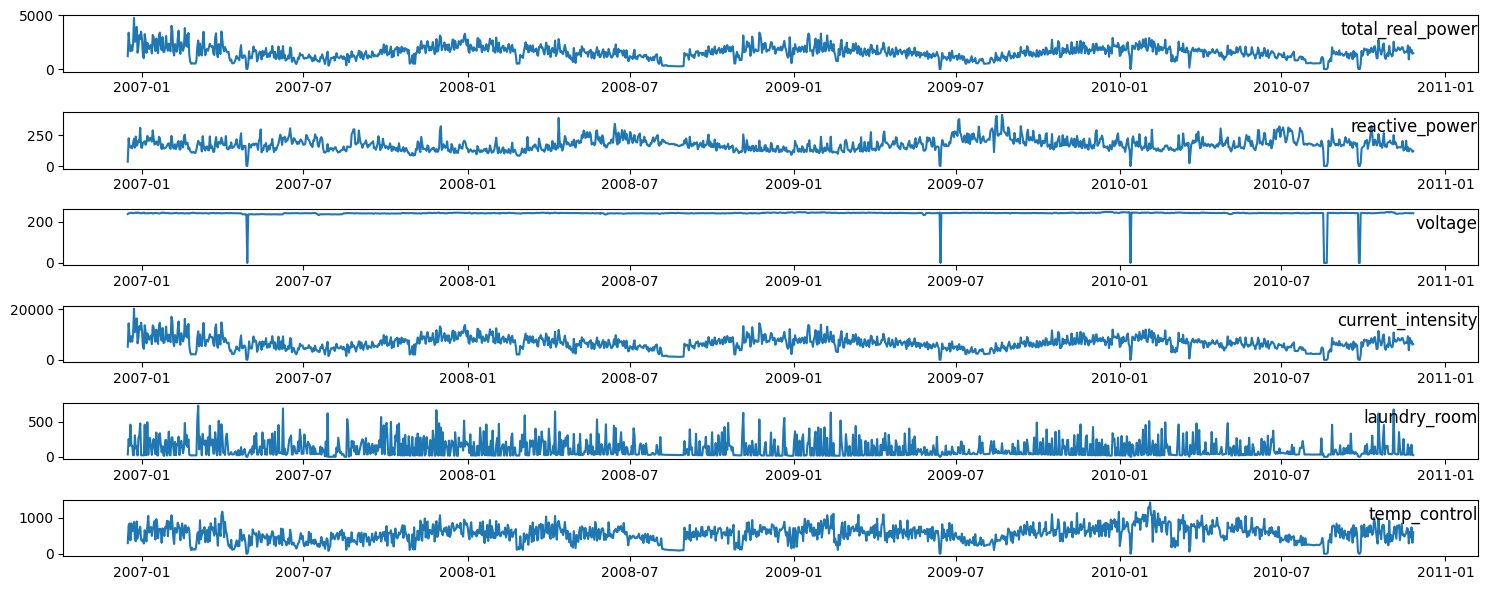

In [12]:
# Let's plot our daily consumption

values_daily = df_daily.values


# specify columns to plot
groups = [0, 1, 2, 3, 5, 6]
i = 1
# plot each column
plt.figure(figsize=(15, 6))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(df_daily.index, values_daily[:, group])
    plt.title(df_daily.columns[group], y=0.5, loc='right')
    i += 1
plt.tight_layout() 
plt.show()

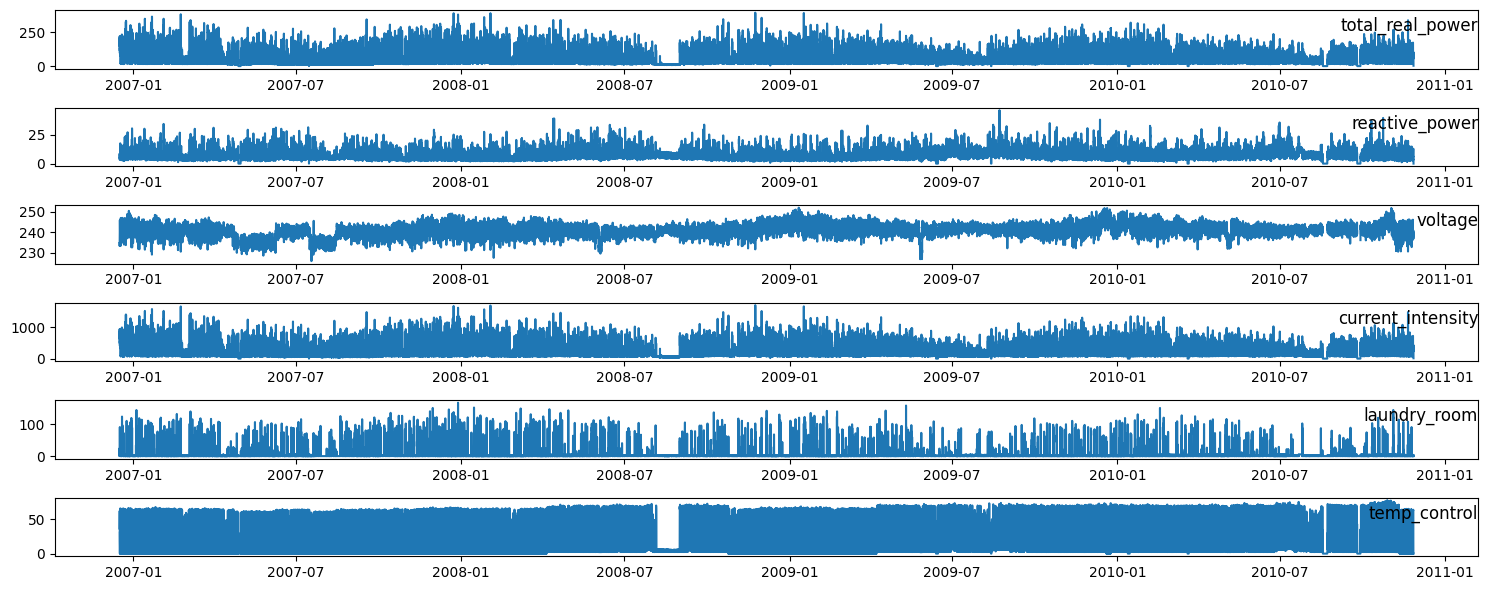

In [13]:
# Let's plot our hourly consumption

values_hourly = df_hourly.values


# specify columns to plot
groups = [0, 1, 2, 3, 5, 6]
i = 1
# plot each column
plt.figure(figsize=(15, 6))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(df_hourly.index, values_hourly[:, group])
    plt.title(df_hourly.columns[group], y=0.5, loc='right')
    i += 1
plt.tight_layout() 
plt.show()

In [14]:
df_daily.columns


Index(['total_real_power', 'reactive_power', 'voltage', 'current_intensity',
       'kitchen', 'laundry_room', 'temp_control'],
      dtype='object')

In [23]:
# Based on https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg
 

# ensure all data is float
values = values_daily.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 30, 1)

# drop last columns
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.drop(reframed.columns[-values_daily.shape[1]+1:], axis=1, inplace=True)


print(reframed.head())

    var1(t-30)  var2(t-30)  var3(t-30)  var4(t-30)  var5(t-30)  var6(t-30)  \
30    0.253316    0.083579    0.954771    0.256470    0.000000    0.045090   
31    0.710284    0.540899    0.970303    0.712788    0.181875    0.345776   
32    0.461690    0.387216    0.974929    0.457773    0.095098    0.216451   
33    0.349059    0.361249    0.978032    0.351181    0.075058    0.627797   
34    0.466283    0.385316    0.979280    0.461030    0.000000    0.218680   

    var7(t-30)  var1(t-29)  var2(t-29)  var3(t-29)  ...  var6(t-2)  var7(t-2)  \
30    0.207472    0.710284    0.540899    0.970303  ...   0.245685   0.477657   
31    0.561892    0.461690    0.387216    0.974929  ...   0.348088   0.546477   
32    0.590406    0.349059    0.361249    0.978032  ...   0.184904   0.638630   
33    0.261003    0.466283    0.385316    0.979280  ...   0.053184   0.277261   
34    0.592301    0.359624    0.345032    0.974157  ...   0.473780   0.676578   

    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-

In [24]:


# Reset the index
df_hourly.reset_index(inplace=True)
df_daily.reset_index(inplace=True)

# Export results
df_daily.to_csv('data/df_daily.csv', index=False)
df_hourly.to_csv('data/df_hourly.csv', index=False)
reframed.to_csv('data/reframed.csv', index=False)

